## Логистическая регрессия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    def __init__(self, C=1, alpha=0.01, max_epoch=10, penalty='l2'):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        penalty - способ регуляризации: '0', 'l1', 'l2'
        """
        self.C = C
        self.alpha = alpha
        self.penalty = penalty
        self.max_epoch = max_epoch
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        X_ = np.c_[np.ones(shape=(X.shape[0],1)),X] # adding column of ones; shape (400,3)
        theta=np.random.randn(X_.shape[1],1) # random initialization; shape (3,1)
        cost=np.ones(self.max_epoch)
        m = X.shape[0] # number of observations (400)
        
        if self.penalty=='0':
            LZ, LO, LT = [1,0,0]
        elif self.penalty=='l1':
            LZ, LO, LT = [0,1,0]
        elif self.penalty=='l2':
            LZ, LO, LT = [0,0,1]
            
        for epoch in range(self.max_epoch):
            p = np.random.permutation(range(m))
            
            for idx in p:
                xi = X_[[idx],:] # shape (1,3)
                yi = y[idx]      # shape (1,)
                pi_hat = 1. / (1. + np.exp(-np.dot(xi,theta))) # shape (1,)
                dtheta = np.dot(xi.T,(pi_hat-yi))
                reg_dtheta = np.zeros(shape=theta.shape)*LZ + \
                    ((1. / self.C)*np.sign(theta))*LO + \
                    ((2. / self.C)*theta)*LT # regularization for theta
                theta = theta - self.alpha*(dtheta+reg_dtheta)

            p_hat = 1. / (1 + np.exp(-np.dot(X_,theta)))  # shape (400,1)
            error_epoch = - (y*np.log(p_hat) + (1-y)*np.log(1-p_hat)).mean() + \
                0*LZ + \
                ((1. / self.C)*np.sum(theta) / m)*LO + \
                ((1. / self.C)*np.sum(np.square(theta)) / m)*LT
            cost[epoch]=error_epoch
        return theta,cost

    def predict(self, X, theta):
        '''
        Возвращение метки класса
        '''
        X_ = np.c_[np.ones(shape=(X.shape[0],1)),X] # adding column of ones
        p_hat=1. / (1 + np.exp(-np.dot(X_,theta))) # shape (400,1)
        y_hat=[1 if i>=.5 else 0 for i in p_hat] # list of 400
        return y_hat
    
    def predict_proba(self, X, theta):
        '''
        Возвращение вероятности каждого из классов
        '''
        X_ = np.c_[np.ones(shape=(X.shape[0],1)),X] # adding column of ones
        p_hat = 1. / (1 + np.exp(-np.dot(X_,theta))) # shape (400,1)
        return p_hat

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

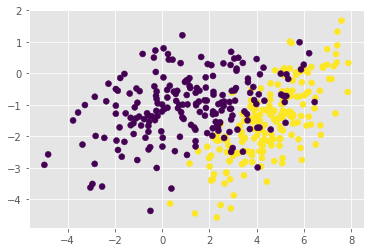

In [3]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Без регуляризации
[[-1.25052218]
 [ 0.47844782]
 [-0.17286642]]


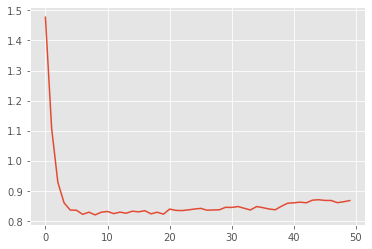

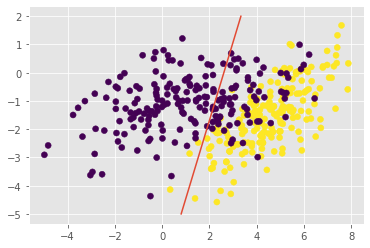

In [4]:
print('Без регуляризации')
model = MySGDClassifier(C=1, alpha=0.001, max_epoch=50, penalty='0')
theta_,error_ = model.fit(X, y)
print(theta_)

plt.plot(range(50),error_)
plt.show()

plt.scatter(X[:,0], X[:,1], c=y)
y_lin = range(-5,3)
x_lin = (-theta_[0]-y_lin*theta_[2]) / theta_[1]
plt.plot(x_lin,y_lin)
plt.show()

l1-регуляризация
[[-0.00057318]
 [-0.00257426]
 [ 0.00105303]]


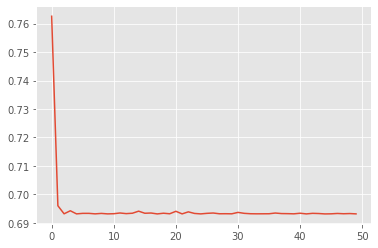

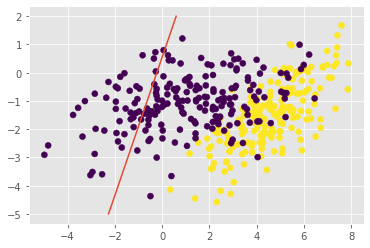

In [5]:
print('l1-регуляризация')
model = MySGDClassifier(C=1, alpha=0.001, max_epoch=50, penalty='l1')
theta_,error_ = model.fit(X, y)
print(theta_)

plt.plot(range(50),error_)
plt.show()

plt.scatter(X[:,0], X[:,1], c=y)
y_lin = range(-5,3)
x_lin = (-theta_[0]-y_lin*theta_[2]) / theta_[1]
plt.plot(x_lin,y_lin)
plt.show()

l2-регуляризация
[[-0.04965012]
 [ 0.15704416]
 [-0.00556785]]


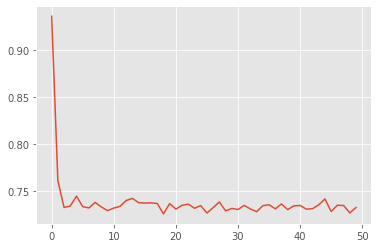

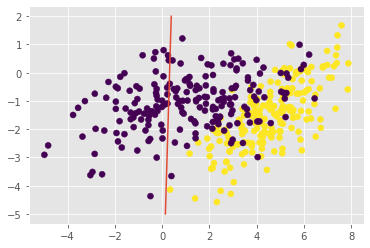

In [12]:
print('l2-регуляризация')
model=MySGDClassifier(C=1, alpha=0.001, max_epoch=50, penalty='l2')
theta_,error_ = model.fit(X, y)
print(theta_)

plt.plot(range(50),error_)
plt.show()

plt.scatter(X[:,0], X[:,1], c=y)
y_lin = range(-5,3)
x_lin = (-theta_[0]-y_lin*theta_[2]) / theta_[1]
plt.plot(x_lin,y_lin)
plt.show()

## Анализ сходимости

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/эпохи (выбрать одно) для разных `alpha`.

Без регуляризации


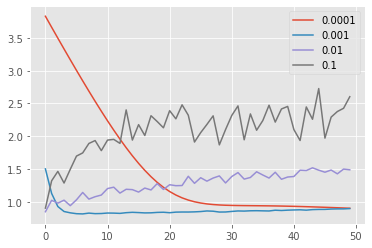

In [7]:
print('Без регуляризации')
fig, ax = plt.subplots()
for count,i in enumerate([0.0001,0.001,0.01,0.1]):
    thetai_,errori_= MySGDClassifier(C=1, alpha=i, max_epoch=50, penalty='0').fit(X, y)
    ax.plot(np.arange(50),errori_,label=i)
leg = ax.legend()

l1-регуляризация


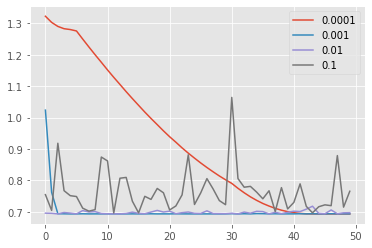

In [14]:
print('l1-регуляризация')
fig, ax = plt.subplots()
for count,i in enumerate([0.0001,0.001,0.01,0.1]):
    thetai_,errori_= MySGDClassifier(C=1, alpha=i, max_epoch=50, penalty='l1').fit(X, y)
    ax.plot(np.arange(50),errori_,label=i)
leg = ax.legend()

l2-регуляризация


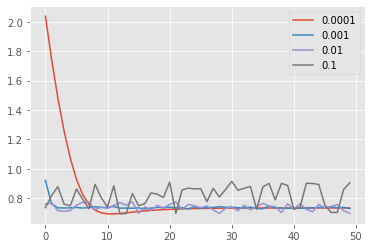

In [9]:
print('l2-регуляризация')
fig, ax = plt.subplots()
for count,i in enumerate([0.0001,0.001,0.01,0.1]):
    thetai_,errori_= MySGDClassifier(C=1, alpha=i, max_epoch=50, penalty='l2').fit(X, y)
    ax.plot(np.arange(50),errori_,label=i)
leg = ax.legend()